#Stock Market Analysis Using GRU

#Analysis

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our dataset. At last, we will find the trend and seasonality in the dataset.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
Meta = pd.read_csv('/content/META.csv', index_col='Date', parse_dates=['Date'])
Meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151600,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


In [43]:
Meta.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3.053000e+03
mean,170.839902,173.059315,168.711150,170.946053,170.614478,2.999018e+07
std,109.244843,110.643906,107.950337,109.368055,109.199958,2.605377e+07
min,18.080000,18.270000,17.549999,17.730000,17.693642,2.830219e+06
25%,82.769997,83.500000,82.150002,82.750000,82.580299,1.592590e+07
50%,161.479996,164.000000,159.279999,161.360001,161.029099,2.220520e+07
75%,219.309998,221.149994,216.110001,218.860001,218.411179,3.454010e+07
max,542.349976,542.809998,531.020020,539.909973,539.909973,5.735764e+08


After describing the Meta dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [44]:
Meta.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [45]:
Meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3053 entries, 2012-05-18 to 2024-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3053 non-null   float64
 1   High       3053 non-null   float64
 2   Low        3053 non-null   float64
 3   Close      3053 non-null   float64
 4   Adj Close  3053 non-null   float64
 5   Volume     3053 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 167.0 KB


In [46]:
Meta.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
fig = px.histogram(Meta,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [48]:
fig = px.histogram(Meta,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

In [49]:
fig = px.scatter(Meta,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

In [50]:
Meta.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999786,0.999771,0.999530,0.999529,-0.379719
High,0.999786,1.000000,0.999732,0.999787,0.999786,-0.375977
Low,0.999771,0.999732,1.000000,0.999792,0.999791,-0.383882
Close,0.999530,0.999787,0.999792,1.000000,1.000000,-0.380149
Adj Close,0.999529,0.999786,0.999791,1.000000,1.000000,-0.380060
Volume,-0.379719,-0.375977,-0.383882,-0.380149,-0.380060,1.000000


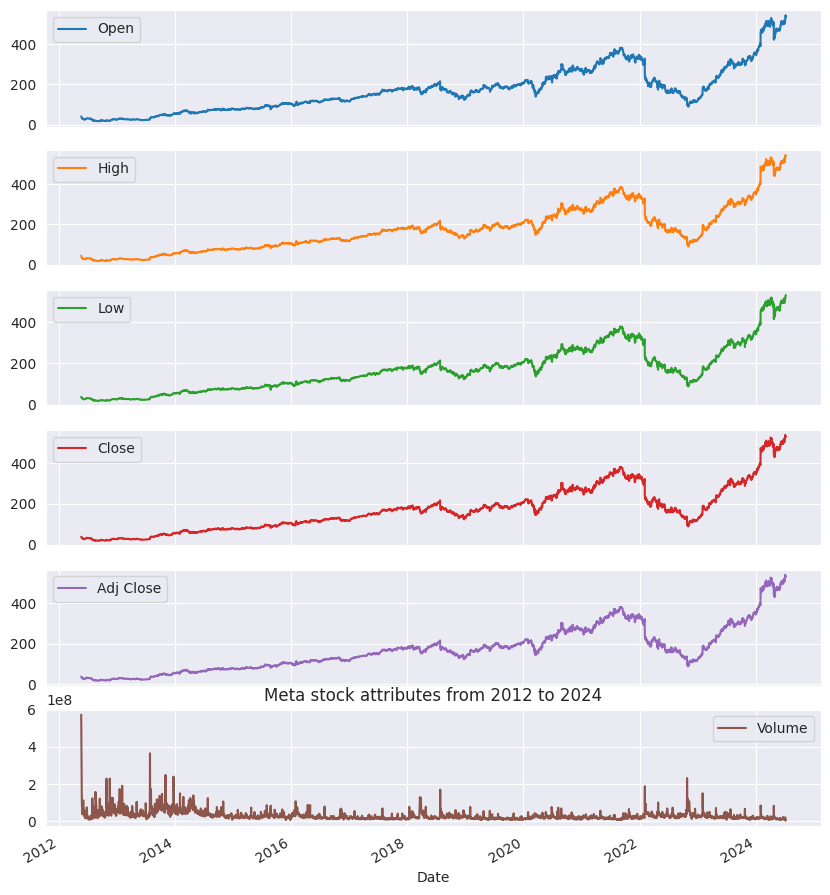

In [51]:
Meta['2012':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('Meta stock attributes from 2012 to 2024')
plt.show()

###High plot

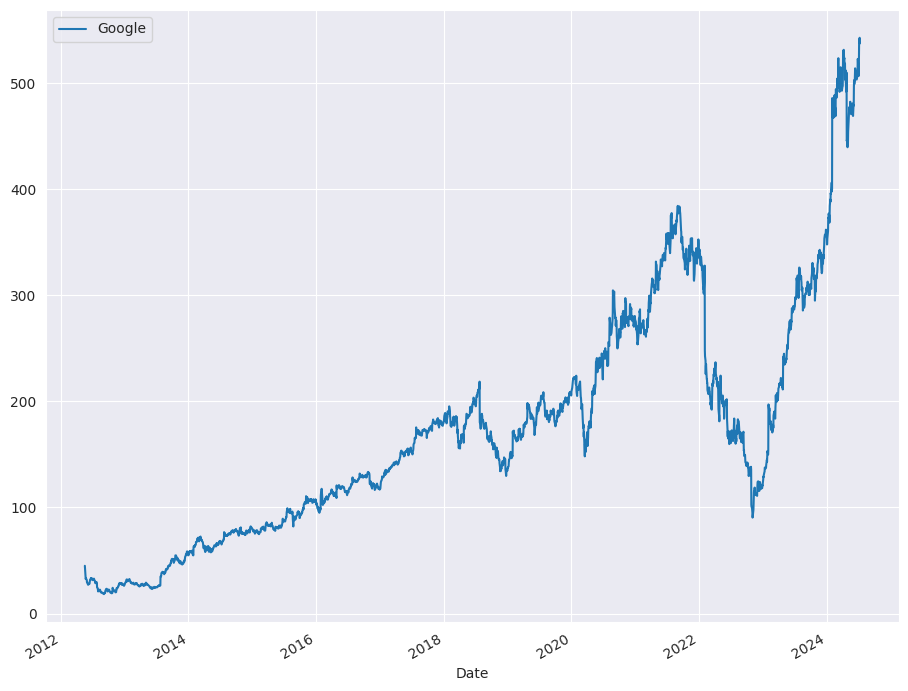

In [52]:
# Plotting before normalization
Meta.High.plot()
plt.legend(['Google'])
plt.show()

In [53]:
# Normalizing and comparison
# Both stocks start from 100
'''normalized_Meta = google.High.div(Meta.High.iloc[0]).mul(100)
plt.legend(['Google'])
plt.show()'''

"normalized_Meta = google.High.div(Meta.High.iloc[0]).mul(100)\nplt.legend(['Google'])\nplt.show()"

In Microsoft data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss.

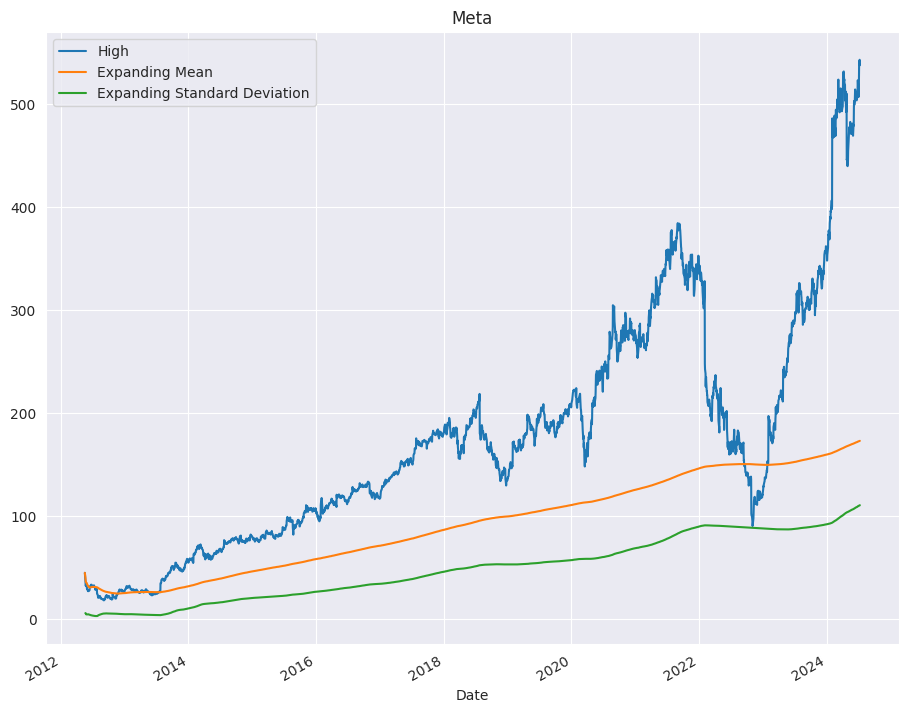

In [54]:
# Expanding window functions
Meta_mean = Meta.High.expanding().mean()
Meta_std = Meta.High.expanding().std()
Meta.High.plot()
Meta_mean.plot()
Meta_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Meta')
plt.show()

###Close

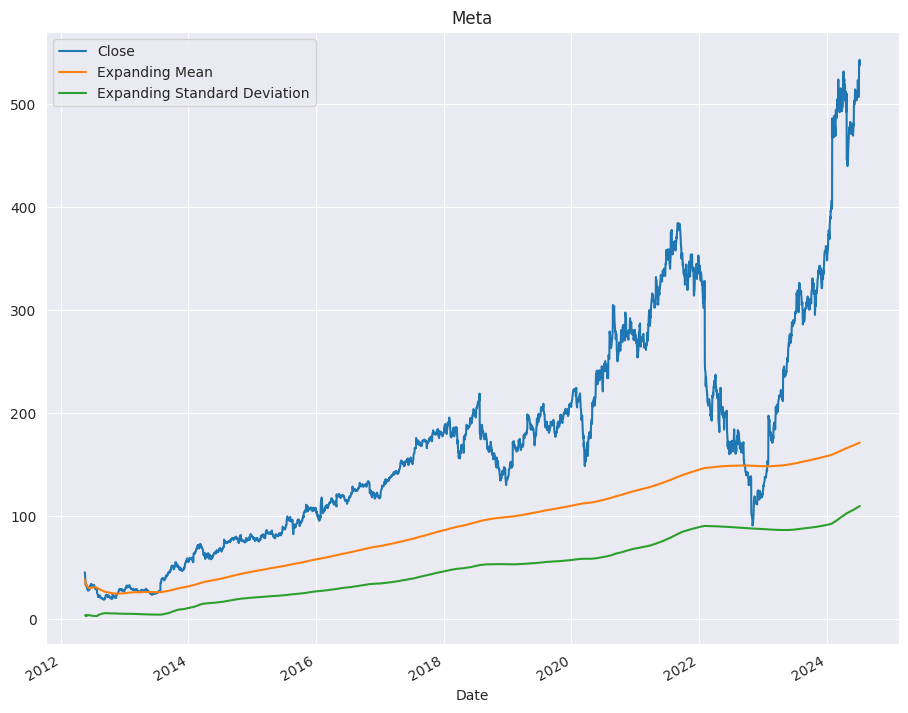

In [55]:
# Expanding window functions
Meta_mean = Meta.Close.expanding().mean()
Meta_std = Meta.Close.expanding().std()
Meta.High.plot()
Meta_mean.plot()
Meta_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Meta')
plt.show()

In [56]:
from pylab import rcParams
import statsmodels.api as sm

##Trend and Seasonality

Meta data

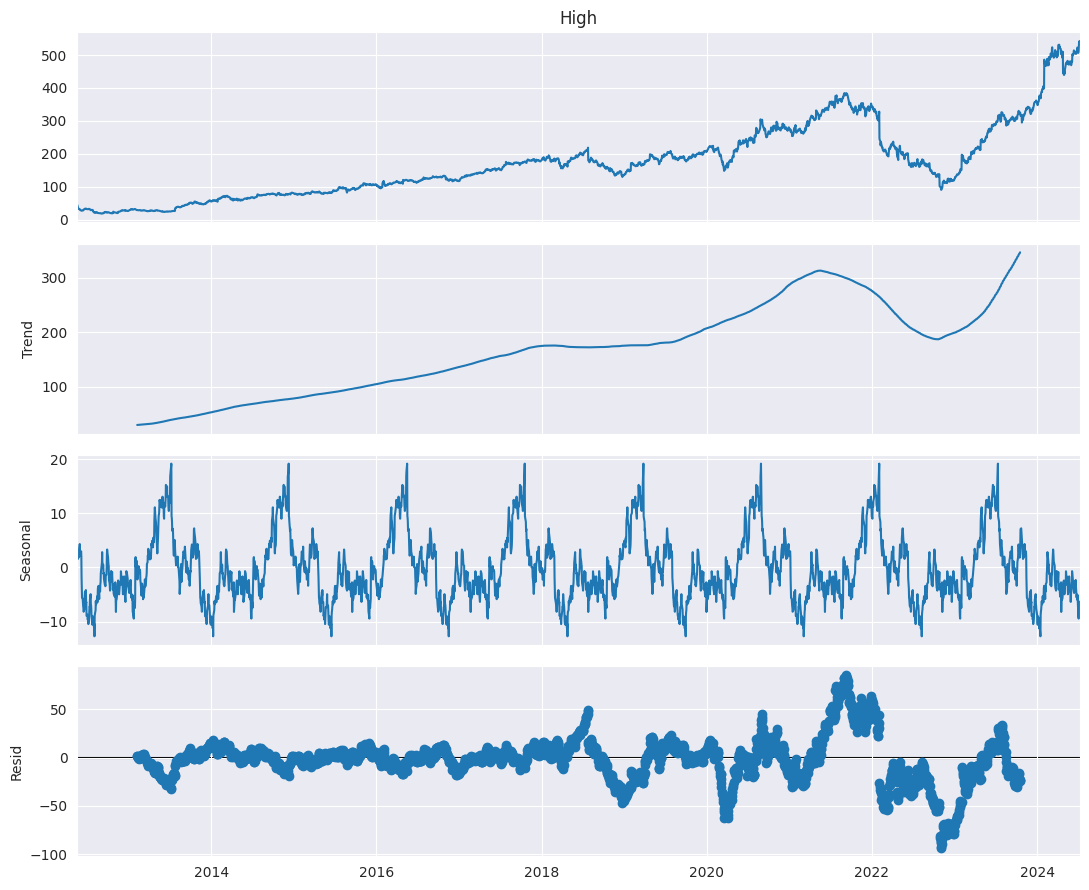

In [57]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_Meta_volume = sm.tsa.seasonal_decompose(Meta["High"],period=360) # The frequncy is annual
figure = decomposed_Meta_volume.plot()
plt.show()

###Close

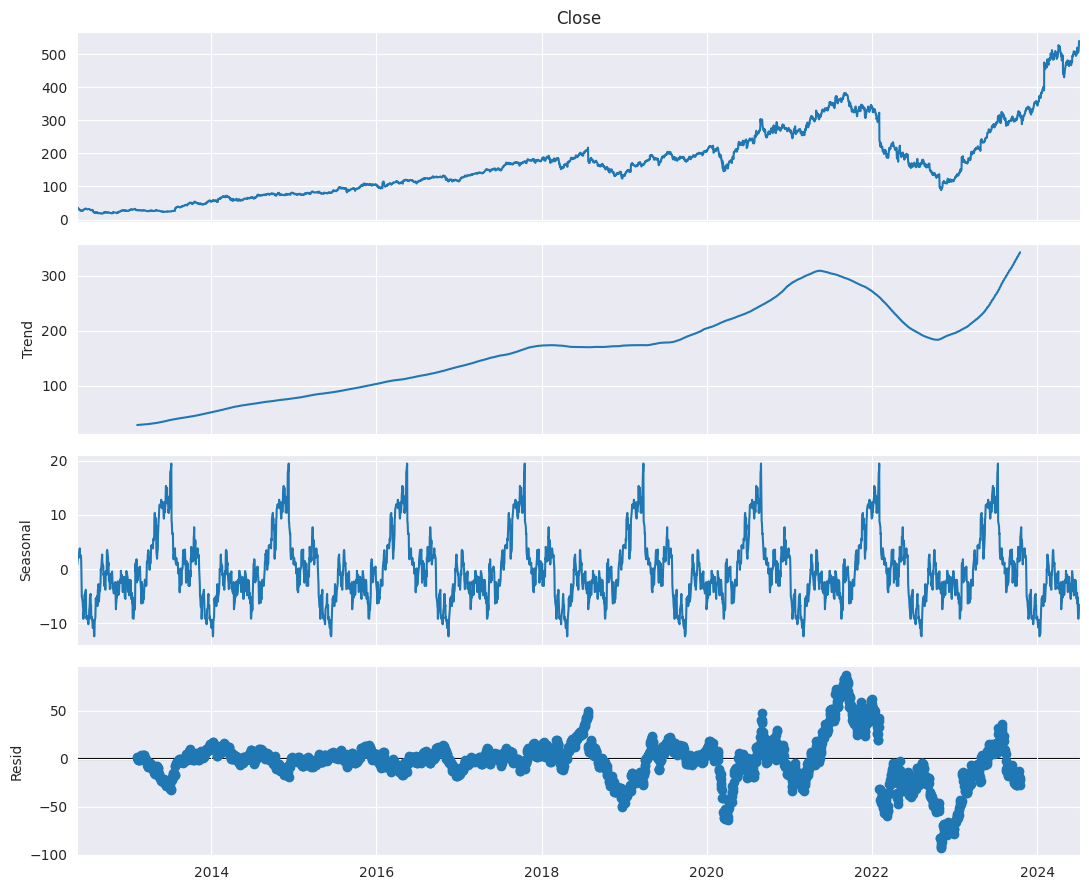

In [58]:
rcParams['figure.figsize'] = 11, 9
decomposed_Meta_volume = sm.tsa.seasonal_decompose(Meta["Close"],period=360) # The frequncy is annual
figure = decomposed_Meta_volume.plot()
plt.show()

#Prediction

##Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


By using GRU time series forecasting we will forcaste and check.

In [59]:

filepath = '/content/META.csv'
data_Meta = pd.read_csv(filepath)
data_Meta = data_Meta.sort_values('Date')
data_Meta.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151600,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


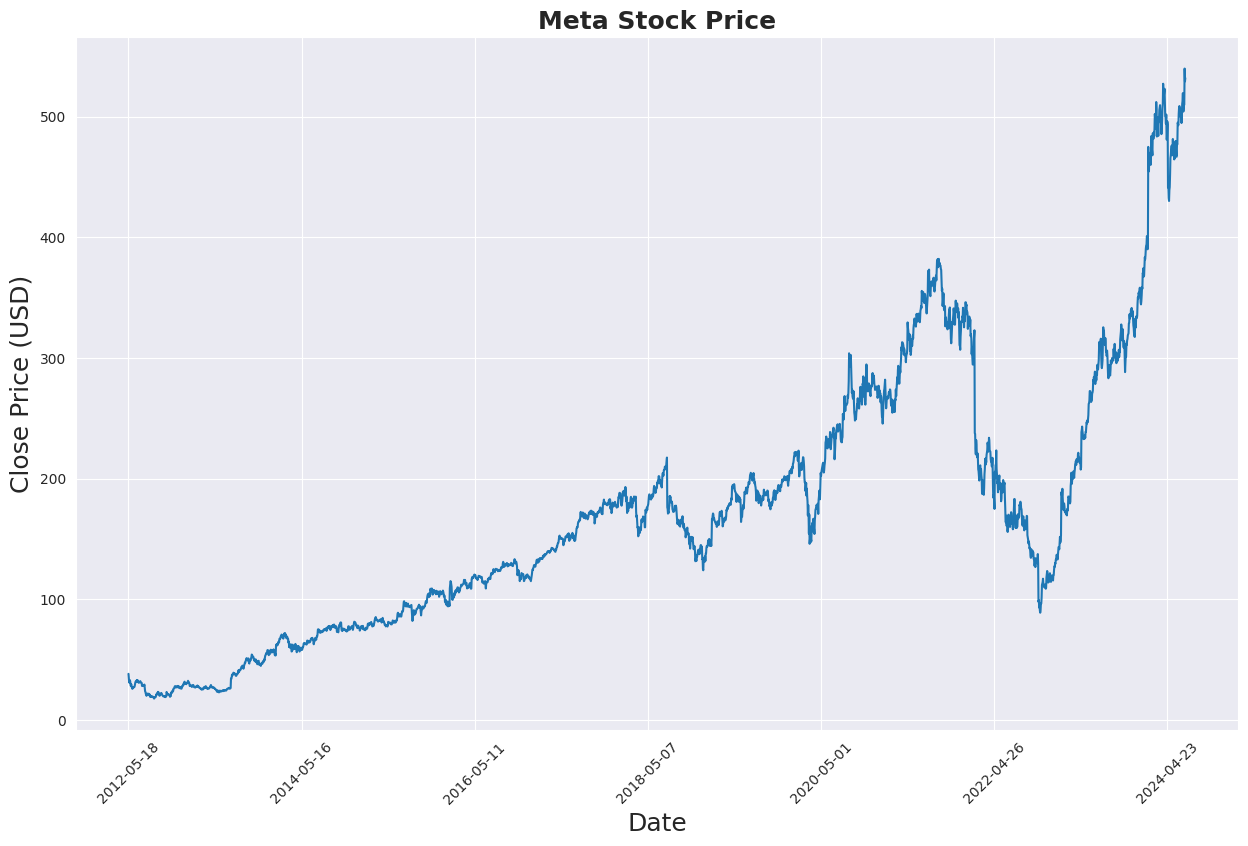

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_Meta[['Close']])
plt.xticks(range(0,data_Meta.shape[0],500),data_Meta['Date'].loc[::500],rotation=45)
plt.title("Meta Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [61]:
price_Meta = data_Meta[['Close']]
price_Meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3053 non-null   float64
dtypes: float64(1)
memory usage: 24.0 KB


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta['Close'].values.reshape(-1,1))

<ipython-input-62-fae4570b63b3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [64]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_Meta, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2426, 19, 1)
y_train.shape =  (2426, 1)
x_test.shape =  (607, 19, 1)
y_test.shape =  (607, 1)


In [65]:

import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [66]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [67]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [68]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [69]:
import time

In [70]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.2969963848590851
Epoch  1 MSE:  0.13336937129497528
Epoch  2 MSE:  0.11395140737295151
Epoch  3 MSE:  0.11482346802949905
Epoch  4 MSE:  0.07898477464914322
Epoch  5 MSE:  0.06799740344285965
Epoch  6 MSE:  0.06729811429977417
Epoch  7 MSE:  0.05452930927276611
Epoch  8 MSE:  0.029621662572026253
Epoch  9 MSE:  0.01259129960089922
Epoch  10 MSE:  0.019482392817735672
Epoch  11 MSE:  0.009899544529616833
Epoch  12 MSE:  0.007676730863749981
Epoch  13 MSE:  0.021402524784207344
Epoch  14 MSE:  0.015206792391836643
Epoch  15 MSE:  0.0036611745599657297
Epoch  16 MSE:  0.0019343879539519548
Epoch  17 MSE:  0.0054131727665662766
Epoch  18 MSE:  0.005555229261517525
Epoch  19 MSE:  0.00393992755562067
Epoch  20 MSE:  0.004345257766544819
Epoch  21 MSE:  0.0061760214157402515
Epoch  22 MSE:  0.006923809181898832
Epoch  23 MSE:  0.005544179584830999
Epoch  24 MSE:  0.003186613554134965
Epoch  25 MSE:  0.0018401086563244462
Epoch  26 MSE:  0.002079254249110818
Epoch  27 MSE:  0

In [71]:

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

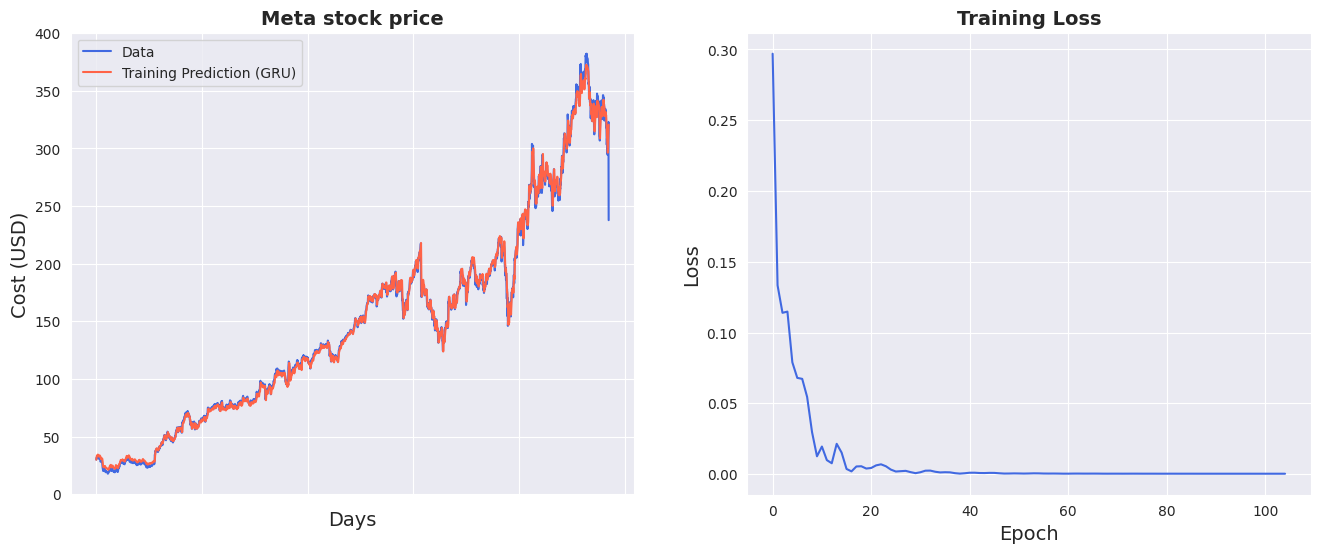

In [73]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Meta stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [74]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 4.37 RMSE
Test Score: 17.68 RMSE


In [76]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_Meta)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_Meta)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_Meta)-1, :] = y_test_pred

original = scaler.inverse_transform(price_Meta['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [78]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Meta Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [86]:
import numpy as np
import pandas as pd
import torch
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Function to predict the next n days
def predict_future(model, data, lookback, n_days, scaler):
    predictions = []
    last_sequence = data[-lookback:].values  # Take the last lookback sequence

    for _ in range(n_days):
        # Normalize the last sequence
        last_sequence_normalized = scaler.transform(last_sequence.reshape(-1, 1)).reshape(1, lookback, 1)
        last_sequence_tensor = torch.from_numpy(last_sequence_normalized).type(torch.Tensor)

        # Predict the next value
        next_value = model(last_sequence_tensor)
        next_value = next_value.detach().numpy()[0, 0]
        next_value = scaler.inverse_transform(np.array(next_value).reshape(-1, 1))[0, 0]

        # Append the predicted value
        predictions.append(next_value)

        # Update the last sequence by removing the first value and adding the predicted value
        last_sequence = np.append(last_sequence[1:], next_value)

    return predictions

# Example data and model initialization
model = None  # Placeholder for your trained model
price_Meta = pd.DataFrame({'Close': np.random.rand(100)})  # Example DataFrame
lookback = 10  # Example lookback window size

# Initialize the scaler (example with MinMaxScaler)
scaler = MinMaxScaler()
scaler.fit(price_Meta[['Close']])  # Fit scaler to your data

# Example function to simulate a model (replace with actual trained model)
class ExampleModel(torch.nn.Module):
    def __init__(self):
        super(ExampleModel, self).__init__()
        self.linear = torch.nn.Linear(lookback, 1)

    def forward(self, x):
        x = x.view(-1, lookback)  # Reshape to (batch_size, lookback)
        x = self.linear(x)
        return x

# Instantiate an example model
model = ExampleModel()

# Predict the next day and next week (7 days)
next_day_prediction = predict_future(model, price_Meta['Close'], lookback, 1, scaler)
next_week_prediction = predict_future(model, price_Meta['Close'], lookback, 7, scaler)

print("Next day's predicted close price: ", next_day_prediction)
print("Next week's predicted close prices: ", next_week_prediction)

# Example of plotting with Plotly
fig = go.Figure()

# Simulating result DataFrame for plotting (replace with actual data)
result_dates = pd.date_range('2023-01-01', periods=100)
result = pd.DataFrame({'Close': np.random.rand(100)}, index=result_dates)

# Add actual data
fig.add_trace(go.Scatter(x=result.index, y=result['Close'], mode='lines', name='Actual Value'))

# Create a list of future dates for predictions
last_date = result.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 8)]

# Add next day's prediction to plot
fig.add_trace(go.Scatter(x=[future_dates[0]], y=next_day_prediction, mode='lines+markers', name='Next Day Prediction'))

# Add next week's predictions to plot
fig.add_trace(go.Scatter(x=future_dates, y=next_week_prediction, mode='lines+markers', name='Next Week Predictions'))

# Update layout for better visualization
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template='plotly_dark'
)

# Add title and show plot
fig.update_layout(
    title='Meta Stock Predictions',
    titlefont=dict(family='Rockwell', size=26, color='white'),
    annotations=[
        dict(
            xref='paper',
            yref='paper',
            x=0.0,
            y=1.05,
            xanchor='left',
            yanchor='bottom',
            text='Meta Stock Predictions',
            font=dict(family='Rockwell', size=26, color='white'),
            showarrow=False
        )
    ]
)

fig.show()


Next day's predicted close price:  [-0.36257732]
Next week's predicted close prices:  [-0.36257732, -0.20720498, 0.0058366098, -0.06737377, -0.15011202, -0.012318614, -0.012778401]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/